Simple WorkFlow with Graph

In [1]:
def function3(input3):
    return input3

In [2]:
def function1(input1):
    return input1 + " from first function"

def function2(input2):
    output = function3("this is function3 in between")
    return input2 +" "+ output +" and Patel from second function"

In [3]:
from langgraph.graph import Graph

workflow1 = Graph()

In [4]:
workflow1.add_node("function1",function1)
workflow1.add_node("function2",function2)

workflow1.add_edge("function1","function2")

In [5]:
workflow1.set_entry_point("function1")

In [6]:
workflow1.set_finish_point("function2")

In [7]:
app1 = workflow1.compile()

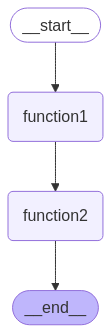

In [8]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [9]:
# app1.invoke("hi this is neal")

In [10]:
input = "hi this is neal"

In [11]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_____")
        print(value)
        print("\n")

here is output from function1
_____
hi this is neal from first function


here is output from function2
_____
hi this is neal from first function this is function3 in between and Patel from second function




Integrating LLM call in the LangGraph

In [12]:
import os
from dotenv import load_dotenv
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=gemini_api_key)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key=gemini_api_key)

c:\AI\langgraph-end-to-end\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [14]:
def function1(input):
    llm =  ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key=gemini_api_key)
    response = llm.invoke(input).content
    return response

In [15]:
def function2(input):
    upper_case = input.upper()
    return upper_case

In [16]:
from langgraph.graph import Graph
workflow2 = Graph()

In [17]:
workflow2.add_node("llm",function1)
workflow2.add_node("upper_string",function2)

In [18]:
workflow2.add_edge("llm","upper_string")

In [19]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [20]:
app2 = workflow2.compile()

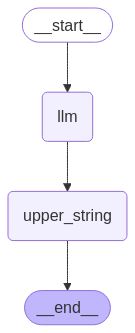

In [21]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [22]:
app2.invoke("what is name of first indian home minister")

'THE FIRST HOME MINISTER OF INDIA WAS **SARDAR VALLABHBHAI PATEL**.'

In [23]:
print(app2.invoke("what is genai explain in detail"))

## GENERATIVE AI (GENAI) EXPLAINED IN DETAIL

GENERATIVE AI (GENAI) REFERS TO A CATEGORY OF ARTIFICIAL INTELLIGENCE ALGORITHMS DESIGNED TO **GENERATE NEW CONTENT** THAT RESEMBLES THE DATA IT WAS TRAINED ON.  INSTEAD OF SIMPLY RECOGNIZING PATTERNS OR CLASSIFYING DATA, GENAI MODELS CAN CREATE ENTIRELY NEW OUTPUTS, SUCH AS TEXT, IMAGES, AUDIO, VIDEO, AND EVEN CODE.

THINK OF IT LIKE THIS: INSTEAD OF JUST BEING ABLE TO IDENTIFY A CAT IN A PICTURE, GENAI CAN *DRAW* A PICTURE OF A CAT, EVEN ONE THAT DOESN'T EXIST IN ITS TRAINING DATA.

**KEY CONCEPTS AND COMPONENTS:**

* **TRAINING DATA:**  GENAI MODELS LEARN BY ANALYZING MASSIVE DATASETS OF EXISTING CONTENT. THE QUALITY AND DIVERSITY OF THIS DATA ARE CRUCIAL TO THE MODEL'S PERFORMANCE.  FOR EXAMPLE, A GENAI MODEL TRAINED ON A LARGE COLLECTION OF CLASSICAL PAINTINGS WILL LIKELY GENERATE ART WITH STYLISTIC ELEMENTS SIMILAR TO THOSE PAINTINGS.
* **NEURAL NETWORKS:**  MOST GENAI MODELS ARE BASED ON DEEP LEARNING TECHNIQUES, PARTICULARLY NEURAL 

In [24]:
input = "what is name of first indian home minister"

In [25]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_____")
        print(value)
        print("\n")

here is output from llm
_____
The first Home Minister of India was **Sardar Vallabhbhai Patel**.


here is output from upper_string
_____
THE FIRST HOME MINISTER OF INDIA WAS **SARDAR VALLABHBHAI PATEL**.




Lets Create our own output token counter

In [26]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [27]:
workflow3 = Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3 = workflow3.compile()

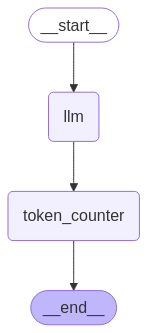

In [28]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [29]:
app3.invoke("what is a name of first indian home minister?")

'total token number is 10'

In [30]:
input="ask any question"

In [31]:
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Okay, here's a question for you:

**If you could have any superpower, but it could only be used to solve one specific problem in the world, what superpower would you choose and what problem would you solve?**


here is output from token_counter
_______
total token number is 37




In [32]:
#### Integrating RAG Pipeline #########

import os
from dotenv import load_dotenv
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=gemini_api_key)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key=gemini_api_key)

In [33]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [34]:
loader = DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

db = Chroma.from_documents(new_docs,embeddings)

retriever = db.as_retriever(search_kwargs={"k":3})

query = "Tell me about llama3?"
docs = retriever.get_relevant_documents(query)
print(docs)
# print(docs[0].metadata)
# print(docs[0].page_content)

# for doc in docs:
#     print(doc)

C:\Users\Parth\AppData\Local\Temp\ipykernel_15952\3504320004.py:15: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


[Document(metadata={'source': '..\\data\\llama3.txt'}, page_content='the 8B parameter version of Llama 3 as being "surprisingly capable" given it\'s size.[11]'), Document(metadata={'source': '..\\data\\llama3.txt'}, page_content='The latest version is Llama 3 released in April 2024.[4]'), Document(metadata={'source': '..\\data\\llama3.txt'}, page_content='and Claude in most benchmarks.[9][10] Wired describes the 8B parameter version of Llama 3 as being')]


In [35]:
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [36]:
AgentState= {}

In [37]:
AgentState["messages"]= []

In [38]:
AgentState

{'messages': []}

In [39]:
AgentState["messages"].append("hi, how are you?")

In [40]:
AgentState["messages"].append("hi, what ypu doing?")

In [41]:
AgentState

{'messages': ['hi, how are you?', 'hi, what ypu doing?']}

In [42]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [43]:
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

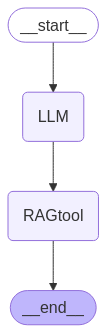

In [44]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [45]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [46]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():   
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about llama3 model', 'A large language model created by Meta.']}

---

Output from node 'RAGtool':
---
The 8B parameter version of Llama 3 is described as "surprisingly capable" given its size. Llama models have been compared favorably against other large language models.

---



In [ ]:
import os
from dotenv import load_dotenv
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

gemini_api_key = os.getenv("GEMINI_API_KEY")

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=gemini_api_key)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key=gemini_api_key)

In [48]:
loader2 = DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs2 = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap = 50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]



In [49]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [50]:
query = "Tell me About Japan's Industrial Growth? "
docs = retriever2.get_relevant_documents(query)
# print(docs)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data\\japan.txt'}
Japan's last four year GDP:
page_content='Japan's last four year GDP:' metadata={'source': '..\\data\\japan.txt'}
page_content='Industrial revival hope for Japan' metadata={'source': '..\\data\\japan.txt'}
page_content='Industrial revival hope for Japan

Japanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over.' metadata={'source': '..\\data\\japan.txt'}


In [51]:
from typing import TypedDict,Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [52]:
from pydantic import BaseModel, Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [53]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [67]:
def function_1(state):
    message= state["messages"]
    question = message[-1]
    print(question)

    template = """
    Your task is to classify the given user query into one of the following categories: [Japan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt = PromptTemplate(template=template,input_variables=[question],partial_variables={"format_instructions":parser.get_format_instructions()})

    chain = prompt|llm|parser

    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)
    return {"messages": [response.Topic]}

In [68]:
template="""
    Your task is to classify the given user query into one of the following categories: [Japan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: "Tell me about Japan's Industrial Growth"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

In [69]:
state = {"messages":["Tell me about Japan's Industrial Growth"]}

In [70]:
function_1(state)

Tell me about Japan's Industrial Growth
Topic='Japan' Reasoning='The query explicitly asks about Japan.'


{'messages': ['Japan']}

In [71]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [72]:
function_2({'messages': ['Japan']})

-> Calling RAG ->
Japan
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


{'messages': ['Based on the provided documents, here are some facts about Japan:\n\n*   Japanese industry is growing faster than expected.\n*   Weaker exports had helped trigger a 0.1% contraction in the final three months of last year after two previous quarters.\n*   Retail sales picked up faster than at any time since 1997.']}

In [73]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0]

    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages":[response.content]}

In [79]:
def router(state):
    print('-> Router ->')

    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'Japan' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [80]:
from langgraph.graph import StateGraph, END

workflow5 = StateGraph(AgentState)
workflow5.add_node("agent", function_1)
workflow5.add_node("RAG", function_2)
workflow5.add_node("LLM", function_3)

workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)
workflow5.add_edge("LLM",END)
app5=workflow5.compile()

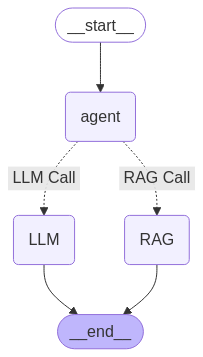

In [81]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [82]:
inputs = {"messages": ["Tell me about Japan's Industrial Growth"]}

In [83]:
output = app5.invoke(inputs)

Tell me about Japan's Industrial Growth
Topic='Japan' Reasoning='The query explicitly asks about Japan.'
-> Router ->
Japan
-> Calling RAG ->
Tell me about Japan's Industrial Growth
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [85]:
print(output)

{'messages': ["Tell me about Japan's Industrial Growth", 'Japan', "Japanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over."]}


In [86]:
inputs = {"messages": ["Tell me about first prime minister of india?"]}

In [87]:
output = app5.invoke(inputs)

Tell me about first prime minister of india?
Topic='Not Related' Reasoning='The query is about the first prime minister of India, which is not related to Japan.'
-> Router ->
Not Related
-> Calling LLM ->


In [88]:
output

{'messages': ['Tell me about first prime minister of india?',
  'Not Related',
  "The first Prime Minister of India was **Jawaharlal Nehru**.\n\nHere's some key information about him:\n\n*   **Tenure:** He served as Prime Minister from August 15, 1947, the day India gained independence, until his death on May 27, 1964. This makes him the longest-serving Prime Minister of India.\n\n*   **Political Party:** He was a prominent leader of the Indian National Congress, which played a crucial role in the Indian independence movement.\n\n*   **Ideology:** Nehru was a key architect of India's post-independence policies. He advocated for a socialist-leaning economy, non-alignment in international relations (the Non-Aligned Movement), and secularism. He was a proponent of planned economic development and established institutions like the Planning Commission.\n\n*   **Key Achievements:**\n\n    *   Played a significant role in shaping India's foreign policy.\n    *   Oversaw the integration of pri